In [1005]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 30
pd.options.display.max_rows = 10
warnings.filterwarnings('ignore')

Цель проекта изучить данные по квартирам на тестовом датасете.
дополнить пункты которые буду выполнять.

1. Get data
2. Clean data. Prepare data
3. Split into Training/Test Data (30% for training data). Shuffle data
4. Set model Hyperparameters
5. Train model
6. Evaluate the model
7. Use the model
8. Save the results

1. Get Data

In [1006]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

2. Clean data. Prepare data
- fill in the empty sells
- replace the unreal values as *0 Rooms, 16 Rooms*
- add the mean prices
- clean the unimportant columns
- get dummies for text values

Fill in the empty sells - LifeSquare, Healthcare_1

In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [1008]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [1009]:
def Orthography(df):
    df = df.rename(columns ={'Helthcare_2':'Healthcare_2'})#orthography
    return df
df = Orthography(df)

In [1010]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Life Square

In [1011]:
Life_Square_test = np.where(df['LifeSquare'].isnull(), df['Square']-df['KitchenSquare'], df['LifeSquare'])
Life_Square_test.mean()

41.799474063598176

In [1012]:
df['LifeSquare'].mean() #only 10% difference

37.19964482767308

In [1013]:
def fill_life_square(df):
    df['LifeSquare'] = np.where(df['LifeSquare'].isnull(), df['Square']-df['KitchenSquare'], df['LifeSquare'])
    return df
df = fill_life_square(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Healthcare_2     10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [1014]:
df_find_negative = df.index[df['LifeSquare'] < 0]
df_find_negative

Int64Index([], dtype='int64')

Healthcare

In [1015]:
df_health = df[['Healthcare_1','Healthcare_2']]
df_health

,Healthcare_1,Healthcare_2
0,NaN,0
1,240.0,1
2,229.0,1
3,1084.0,0
4,2078.0,2
...,...,...
9995,350.0,3
9996,NaN,0
9997,NaN,0
9998,325.0,2


In [1016]:
df_health=df_health[df_health["Healthcare_1"].isnull()]#check only NaN rows, that have to be replaced
df_health

,Healthcare_1,Healthcare_2
0,NaN,0
6,NaN,1
7,NaN,0
8,NaN,0
9,NaN,0
...,...,...
9992,NaN,1
9993,NaN,5
9994,NaN,0
9996,NaN,0


Text(0.5, 1.0, 'How many NaNs corresponds to Healthcare_2 column')

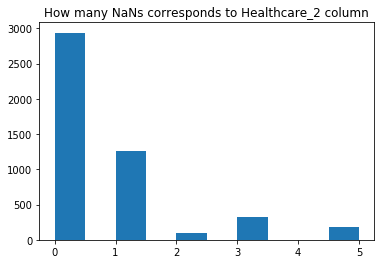

In [1017]:
plt.hist(df_health['Healthcare_2'])
plt.title('How many NaNs corresponds to Healthcare_2 column')

In [1018]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 9997
Data columns (total 2 columns):
Healthcare_1    0 non-null float64
Healthcare_2    4798 non-null int64
dtypes: float64(1), int64(1)
memory usage: 112.5 KB


In [1019]:
df_health.groupby(['Healthcare_2'])['Healthcare_1'].mean()

Healthcare_2
0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: Healthcare_1, dtype: float64

In [1020]:
def healthcare_fill(df):
    df['Healthcare_1']=df['Healthcare_1'].fillna(1000)
    return df
df = healthcare_fill(df)

In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Healthcare_2     10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


get dummies

In [1022]:
df['Ecology_3'].value_counts(normalize=1)

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

In [1023]:
def clean_objects(df):
    df = pd.get_dummies(df)
    return df
df = clean_objects(df)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,1000.0,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1


Check the zero rooms flats

In [1024]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [1025]:
df_0 = df.loc[df['Rooms']==0,:].copy()

In [1026]:
df_0

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,11,3097,0,1000.0,0,0,268394.744389,0,1,0,1,0,1
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,9,1892,0,1000.0,0,1,302211.260887,0,1,0,1,0,1
2269,7317,27,0.0,41.790881,41.790881,0.0,13,0.0,1977,0.211401,9,1892,0,1000.0,0,1,98129.976788,0,1,0,1,0,1
3911,770,28,0.0,49.483501,49.483501,0.0,16,0.0,2015,0.118537,30,6207,1,1183.0,1,0,217009.338463,0,1,0,1,0,1
4366,456,6,0.0,81.491446,81.491446,0.0,4,0.0,1977,0.243205,5,1564,0,540.0,0,0,212864.799112,0,1,0,1,0,1
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,2,469,0,1000.0,0,0,126596.941798,0,1,0,1,0,1
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,43,8429,3,1000.0,3,9,158998.110646,0,1,0,1,0,1
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,9,1892,0,1000.0,0,1,219281.918007,0,1,0,1,0,1


In [1027]:
train_0.groupby(['Square'])['Price'].median()

Square
2.377248      126596.941798
38.697117     158998.110646
41.790881      98129.976788
81.491446     212864.799112
138.427694    268394.744389
212.932361    302211.260887
Name: Price, dtype: float64

Replace the unreal values

In [1028]:
df.groupby(['Rooms'])['Square'].mean()

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

In [1029]:
x2 = df.groupby(['Rooms'])['Square'].mean() 

In [1030]:
x2

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

In [1031]:
y1 = np.array([0, 1, 2, 3, 4, 5, 6, 10, 19], dtype='float64')

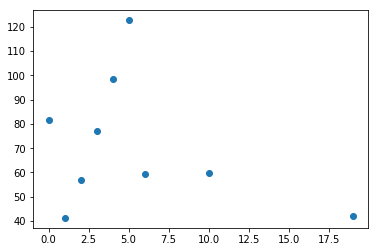

In [1032]:
plt.scatter(y1,x2)

10, 19 rooms flats are in dataset valid, 6, 10 in dataset train. The average square for these flats is similar to 2-rooms flats. Replace the unreal number of the rooms with the median.

In [1033]:
def clean_rooms(df, source_df = df):
    rooms_median = source_df['Rooms'].median()
    df.loc[df['Rooms']>=6, 'Rooms']= rooms_median
    return df

In [1034]:
df = clean_rooms(df, df)

In [1035]:
df.groupby(['Rooms'])['Square'].mean()

Rooms
0.0     81.620358
1.0     41.323277
2.0     56.786719
3.0     76.903234
4.0     98.377544
5.0    122.614941
Name: Square, dtype: float64

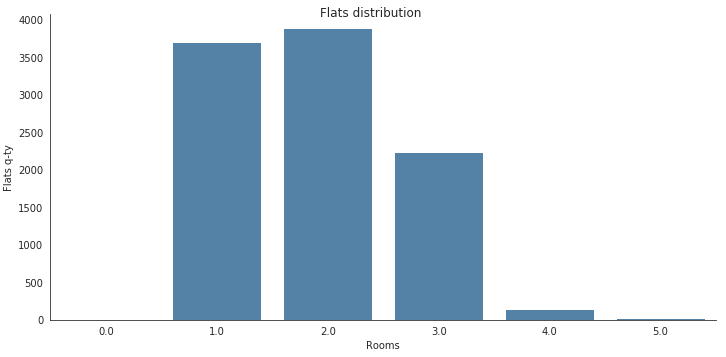

In [1036]:
with sns.axes_style('white'):
    g = sns.catplot("Rooms", data = df, aspect=2, kind ="count", color ='steelblue')
    g.set_ylabels('Flats q-ty')
    g.fig.suptitle('Flats distribution')

In [1037]:
def prepare_data(df):
    df=clean_rooms(df)
    df=clean_objects(df)
    df=healthcare_fill(df)
    df=fill_life_square(df)
    df=Orthography(df)
    return df

Split Data

In [1038]:
train, valid = train_test_split(df, test_size = 0.3, random_state = 1)

In [1039]:
train.shape, valid.shape

((7000, 23), (3000, 23))

In [1040]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1', 'Price',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')

model

In [1041]:
from sklearn.ensemble import RandomForestRegressor as RF

In [1042]:
from sklearn.model_selection import GridSearchCV

In [1071]:
model = RF(n_estimators=1000, max_depth=10, max_features=5, random_state=42)

In [1072]:
fts = [ 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1',
       'Ecology_2_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B']

In [1073]:
model.fit(train.loc[:,fts], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [1074]:
pred_train = model.predict(train.loc[:,fts])

In [1075]:
pred_valid = model.predict(valid.loc[:,fts])

In [1076]:
pred_train

array([226477.09972496, 180576.24400441, 175502.83635002, ...,
       158408.63622287, 313979.61411597, 170596.21550553])

In [1077]:
pred_valid

array([189992.04552183, 220107.58927786, 235448.79330683, ...,
       324423.27017627, 233634.97111454, 347604.97502246])

In [1078]:
from sklearn.metrics import r2_score as r2

In [1079]:
r2(train['Price'],pred_train)

0.8962326785810633

In [1080]:
r2(valid['Price'],pred_valid)

0.7429109309909522

grid search

In [ ]:
#X = pd.DataFrame(df, columns = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare'])

In [ ]:
#y = pd.DataFrame(df, columns = ['Price'], dtype = int)

In [ ]:
#y.head()

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#parameters = [{'n_estimators': [100,1000],
#               'max_depth': [10,12]
        
#               }]

In [ ]:
#clf = GridSearchCV(estimator = RandomForestClassifier(random_state=42), 
#                   param_grid = parameters, 
#                   scoring = 'accuracy',
#                   cv =2)

In [ ]:
#clf.fit(X_train, y_train.values[:, 0])

In [ ]:
#clf.best_params_

TEST

In [1081]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,1000.0,0,0,0,1,0,1,0,1,163370.335486
1,15856,74,2.0,69.263183,68.263183,1.0,6,1.0,1977,0.075779,6,1437,3,1000.0,0,2,0,1,0,1,0,1,215375.077095
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,0,1,0,1,0,1,221534.066266
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,1000.0,3,3,0,1,0,1,0,1,341479.893549
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,1000.0,0,0,0,1,0,1,1,0,136876.748316


In [1082]:
test= prepare_data(test)

In [1083]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,1000.0,0,0,0,1,0,1,0,1,163370.335486
1,15856,74,2.0,69.263183,68.263183,1.0,6,1.0,1977,0.075779,6,1437,3,1000.0,0,2,0,1,0,1,0,1,215375.077095
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,0,1,0,1,0,1,221534.066266
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,1000.0,3,3,0,1,0,1,0,1,341479.893549
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,1000.0,0,0,0,1,0,1,1,0,136876.748316


In [1084]:
test['Price']=model.predict(test.loc[:,fts])

In [1085]:
test.loc[:, ['Id', 'Price']].to_csv('APotoshin_predictions.csv', index=False)